In [ ]:
import numpy as np

In [ ]:
a = ['1',2,3,4]
arr_a = np.array(a)
print(type(a),a)
print(type(arr_a),arr_a)
print(type(arr_a[0]))
print(arr_a.dtype)

<class 'list'> ['1', 2, 3, 4]
<class 'numpy.ndarray'> ['1' '2' '3' '4']
<class 'numpy.str_'>
<U21


In [ ]:
a = [[1,2],[2,3]]
arr_a = np.array(a)
print(type(a),a)
print(type(arr_a),arr_a)
print(type(arr_a[0]))

<class 'list'> [[1, 2], [2, 3]]
<class 'numpy.ndarray'> [[1 2]
 [2 3]]
<class 'numpy.ndarray'>


In [ ]:
a = [{1,2},{2,3},4]
arr_a = np.array(a)
print(type(a),a)
print(type(arr_a),arr_a)
print(type(arr_a[2]))

<class 'list'> [{1, 2}, {2, 3}, 4]
<class 'numpy.ndarray'> [{1, 2} {2, 3} 4]
<class 'int'>


# Decision Tree

In [ ]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

In [ ]:
# step 2: Load Data
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Project/heart.csv')
print("Data Loaded Sucessfully")
print(data.head())

Data Loaded Sucessfully
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [ ]:
# step 3: Encoding Categorical columns
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

le = LabelEncoder()
for col in cat_cols:
  data[col] = le.fit_transform(data[col])

print("\n After Encoding")
print(data.head())


 After Encoding
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


In [ ]:
# step 4: Split Data into Features and target
X = data.drop("HeartDisease",axis=1)
y = data["HeartDisease"]


In [ ]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [ ]:
y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


In [ ]:
# step 5 : Train_test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# step 6 : Create and train decision tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# step 7 : Predictions
y_pred = model.predict(X_test)

In [ ]:
# Step 8: Evaluation Metrics
print("\n Model Evaluation (Before Pruning):")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Model Evaluation (Before Pruning):
Accuracy : 0.782608695652174
Precision: 0.8602150537634409
Recall   : 0.7476635514018691
F1-Score : 0.8
Confusion Matrix:
 [[64 13]
 [27 80]]


In [ ]:
# ROC-AUC
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC  :", roc_auc)

ROC-AUC  : 0.7894161912853502


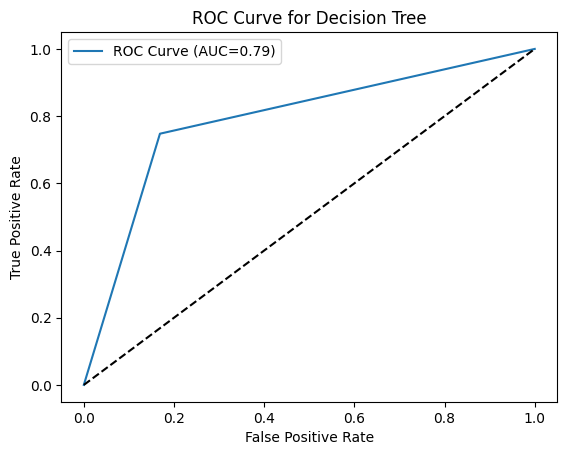

In [ ]:
# Step 9: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve for Decision Tree")
plt.show()

In [ ]:
# Step 10: Pruned Decision Tree
pruned_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=42)
pruned_model.fit(X_train, y_train)
y_pred_pruned = pruned_model.predict(X_test)

print("\n🌳 Model Evaluation (After Pruning):")
print("Accuracy :", accuracy_score(y_test, y_pred_pruned))
print("Precision:", precision_score(y_test, y_pred_pruned))
print("Recall   :", recall_score(y_test, y_pred_pruned))
print("F1-Score :", f1_score(y_test, y_pred_pruned))




🌳 Model Evaluation (After Pruning):
Accuracy : 0.875
Precision: 0.8962264150943396
Recall   : 0.8878504672897196
F1-Score : 0.892018779342723


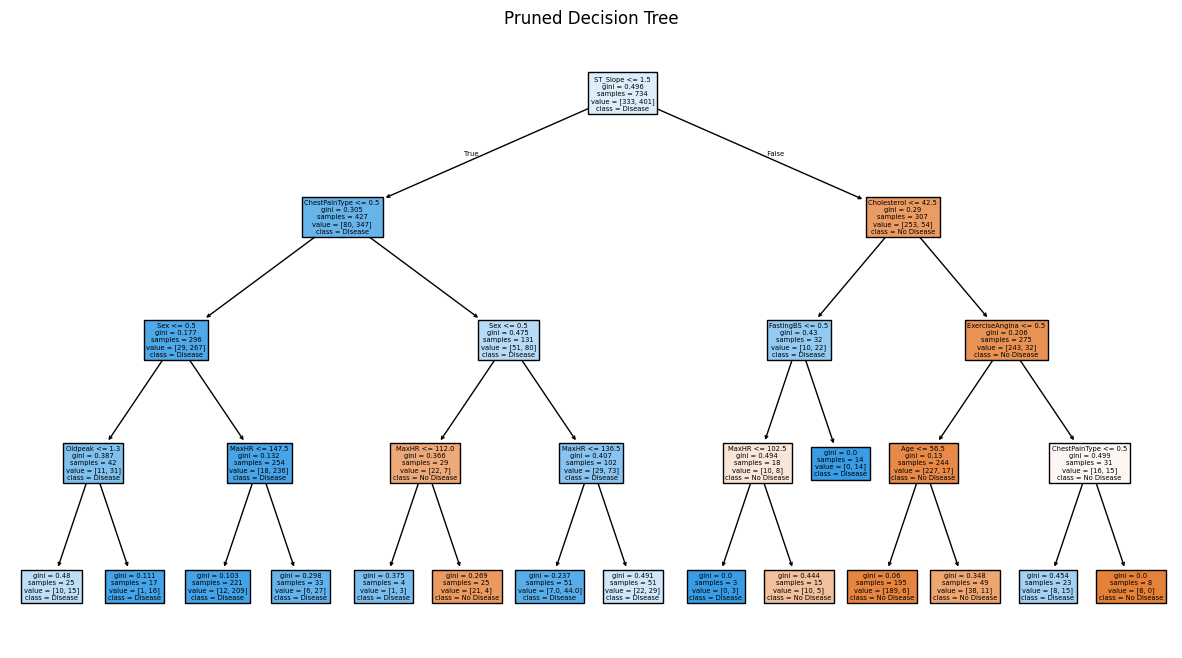

In [ ]:
# Step 11: Visualize Pruned Tree
plt.figure(figsize=(15,8))
plot_tree(pruned_model, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.title("Pruned Decision Tree")
plt.show()